In [1]:
#import sqlite3
from sqlalchemy import create_engine
import pandas as pd
from altair import *
import numpy as np
%matplotlib inline

In [2]:
sql_db = r'D:\Projects\Pr\3556.10//vechtdelta.sqlite'
#conn = sqlite3.connect(sql_db)

In [3]:
disk_engine = create_engine('sqlite:///'+sql_db) 

In [4]:
tablenames = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", disk_engine)
tablenames.head()

,name
0,databaservw
1,sqlite_sequence
2,locatie
3,berekening
4,frequentielijn


In [5]:
# list all column names of tables
for table in tablenames['name']:
    print ('\n')
    print ('TABLE',table)
    tablecolumns = pd.read_sql_query("PRAGMA table_info("+table+");", disk_engine)
    print (tablecolumns[['name','type']])



TABLE databaservw
   name          type
0    id       INTEGER
1  naam  VARCHAR(255)


TABLE sqlite_sequence
   name type
0  name     
1   seq     


TABLE locatie
            name          type
0             id       INTEGER
1  databaservwid       INTEGER
2           naam  VARCHAR(255)
3              x          real
4              y          real


TABLE berekening
        name          type
0         id       INTEGER
1  locatieid       INTEGER
2       naam  VARCHAR(255)
3    bertype  VARCHAR(255)


TABLE frequentielijn
           name     type
0            id  INTEGER
1  berekeningid  INTEGER
2    frequentie     REAL
3    waterstand     REAL


In [6]:
# get all unique berekeningid's
berek_id = pd.read_sql_query("SELECT berekeningid FROM frequentielijn;", disk_engine)
berek_id['berekeningid'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137], dtype=int64)

In [7]:
# get last berekeningid as string
b_id = str(berek_id['berekeningid'].iloc[-1])
print (b_id)

137


In [8]:
freq_ws = pd.read_sql_query("SELECT frequentie, waterstand FROM frequentielijn WHERE berekeningid="+b_id+";", disk_engine)
freq_ws.head()

,frequentie,waterstand
0,0.164124,1.4
1,0.110296,1.5
2,0.071139,1.6
3,0.045003,1.7
4,0.027009,1.8


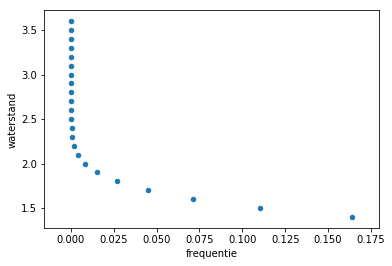

In [9]:
freq_ws.plot(y='waterstand',x='frequentie',kind='scatter')

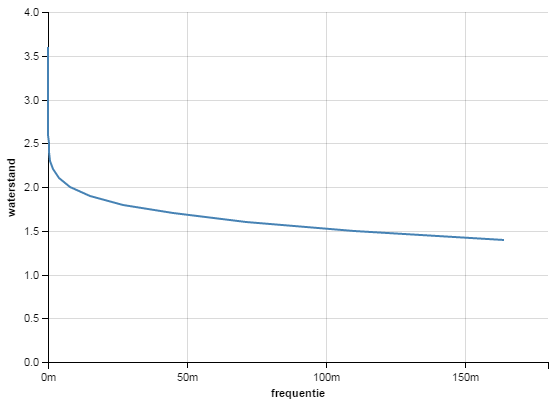

In [10]:
Chart(freq_ws).mark_line().encode(
    Y('waterstand:Q'),
    X('frequentie:Q')
)

In [11]:
# set dynamic domain
y_domain_min = np.floor(freq_ws['waterstand'].min())
y_domain_max = np.ceil(freq_ws['waterstand'].max())

x_domain_min = freq_ws['frequentie'].min()
x_domain_max = freq_ws['frequentie'].max()

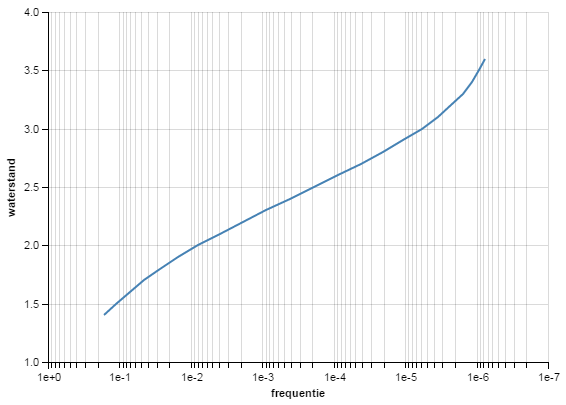

In [12]:
Chart(freq_ws).mark_line().encode(
    Y('waterstand:Q',scale=Scale(domain=[y_domain_min,y_domain_max])),
    X('frequentie:Q',
      scale=Scale(type='log', domain=[x_domain_max,x_domain_min]),
      axis=Axis(format='0.1e'))
)